In [ ]:
from tensorflow.keras.models import Model # Импортируем модели keras: Model
from tensorflow.keras.models import model_from_json
import numpy as np # Импортируем библиотеку numpy
from PIL import Image # импортируем модель Image для работы с изображениями

from google.colab import files # Импортируем Модуль files для работы с файлами
import matplotlib.pyplot as plt # Для виузализации 

In [ ]:
# Функция загрузки  модели и весов
def loadModel(model_json):
  json_file = open(model_json,'r')
  loaded_model_json = json_file.read() # считываем
  json_file.close() # закрываем
  model = model_from_json(loaded_model_json)
  return model

In [ ]:
model = loadModel('flowers-model.json')

In [ ]:
# Загружаем веса
model.load_weights('flowers.hdf5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bn1 (BatchNormalization)    (None, 110, 130, 3)       12        
                                                                 
 Conv2D-layer1 (Conv2D)      (None, 110, 130, 32)      896       
                                                                 
 Conv2D-layer2 (Conv2D)      (None, 110, 130, 32)      9248      
                                                                 
 mp2D-layer1 (MaxPooling2D)  (None, 55, 65, 32)        0         
                                                                 
 Dropout-layer1 (Dropout)    (None, 55, 65, 32)        0         
                                                                 
 bn2 (BatchNormalization)    (None, 55, 65, 32)        128       
                                                                 
 Conv2D-layer3 (Conv2D)      (None, 55, 65, 64)        1

In [ ]:
# Функция проверки формата изображения - альбомный или книжный.
# Возвращаемые значения: True - альбомный, False - книжный
def format_is_album(w: int, h: int):
  return True if w > h else False


# Функция умной обрезки
def smart_trimming(img):
  img_w, img_h = img.size   # Берём размер картинки
  target_size = [130, 110]  # Размер, который мы должны получить в результате

  # Проверка на формат
  if format_is_album(img_w, img_h):
    new_h = target_size[1]                # Делаем высоту основной осью
    new_w = round(new_h / img_h * img_w)  # Считаем ширину
  else:
    new_w = target_size[0]                # Делаем ширину основной осью
    new_h = round(new_w / img_w * img_h)  # Считаем высоту

  # Применяем наши измениния касательно размеров
  img = img.resize((new_w, new_h), Image.ANTIALIAS)

  # Находим центр картинки
  center = [new_w//2, new_h//2]
  # Находим левую верхнюю и правую нижнюю точки для прямоугольной обрезки
  top_left = [center[0] - target_size[0]//2, center[1] - target_size[1]//2]
  bottom_right = [center[0] + target_size[0]//2, center[1] + target_size[1]//2]

  # Обрезаем изображение
  img = img.crop((top_left[0], top_left[1], bottom_right[0], bottom_right[1]))

  return img

In [ ]:
labels_text = ['Ромашка', 'Одуванчик', 'Роза', 'Подсолнух', 'Тюльпан']

Saving Rosa.jpg to Rosa.jpg
Загружен файл "Rosa.jpg" длиной 149692 bytes



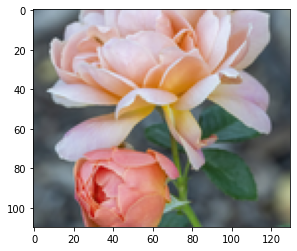

[[4.00417119e-01 3.64467734e-04 4.71494406e-01 1.11857969e-02
  1.16538204e-01]]

Распознан объект:  2 - Роза


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Загружен файл "{name}" длиной {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

print()

for fn in uploaded.keys():
  imgFile = fn
  break

# Загрузим изображение
img = Image.open(imgFile)
img = img.convert("RGB")
# Уменьшаем и обрезаем до 130*110
img_croped = smart_trimming(img)

plt.imshow(img_croped)                     # Отрисовываем картинку
plt.show() 

image_data = np.array(img_croped.getdata())
image = image_data.reshape(110, 130, 3)

predict = model.predict(np.array([image]))

print(predict)

n = 0
print()
print("Распознан объект: ", np.argmax(predict[n]), "-", labels_text[np.argmax(predict[n])])

Загрузить файл для проверки, что нейросеть хорошо распознает объект используя загруженные веса